# 4. tööleht (rühmitamine)

Eelmistes tundides oleme tutvunud pandase paketiga ning samuti õppinud andmete visualiseerimist.

Järgmisena tegeleme andmete rühmitamisega (*clustering*). 

Teooriaga tutvumiseks vaata: 
- https://towardsdatascience.com/the-5-clustering-algorithms-data-scientists-need-to-know-a36d136ef68
- https://towardsdatascience.com/an-introduction-to-clustering-algorithms-in-python-123438574097


Me kasutame clustering algoritme, kui meie eesmärk on olemasolevad andmed lisada väiksematesse gruppidesse sarnasuse alusel. Näiteks meil on inimesed täitnud psühholoogia testi ning me soovime neid jaotada gruppi selle alusel, kas nad on ekstraverdid või introverdid või meil on teada hoonete ehitusandmed ja me soovime teada, kui suur on hoonete ülalpidamiskulu. 



<img src="https://www.researchgate.net/publication/322336480/figure/fig5/AS:580886346375172@1515505505578/Unbiased-network-clustering-of-non-infectious-disease-complications-in-the-Partners.png" width="900" height="900">
Näide clusterdamisest: erinevate haiguste omavahelised seosed.



## Meetodi kirjeldus
Clusterdamise meetodi võib jagada ideeliselt kaheks etapiks:

1) Kauguse defineerimine (mida tähendab, et kaks punkti on omavahel sarnased?)

2) Clusterdamise meetodi valimine (kuidas objektid omavahel kokku sobituvad)

## Kauguse defineerimine (natuke matemaatikat)

Me defineerime kauguse järgmiselt: kahe punkti $A$ ja $B$ vaheline kaugus on $p(A,B)$, mis on mingi positiivne reaalarvuline väärtus. Kuigi kauguse võib arvutada erinevate valemitega, peab see järgima kolme põhiseadust.

1) Kui kaugus on 0, siis on punktide koordinaadid samad. Kui punktide koordinaadid on samad, siis kaugus on 0:
    
$$p(A,B) = 0 \iff	A = B.$$
    
2) Kaugus punkti A ja B vahel on sama mis kaugus punkti B ja A vahel: 

$$p(A,B) = p(B,A).$$

3) Kolmnurga võrratus: Kaugus punkti A ja B vahel on väiksem-võrdne kui A ja B ning B ja C kauguste summa:

$$p(A,B)<= p(A,C)+p(C,B).$$



### Tuttavad kaugused 

Kindlasti olete juba kaugustega enda elus kokku puutunud: kahemõõtmelises maailmas on Pythagorase valem üks kõige lihtsamaid kaugusi. Olgu meil kaks punkti $A(a_1,a_2)$ ja $B(b_1,b_2)$, siis nende vaheline kaugus on:
$$p(A,B) = \sqrt{(a_1-b_1)^2 + (a_2-b_2)^2}.$$
*Huvilised saavad kontrollida, kas tegemist on tõesti kaugusega*

Seda kaugust saab üldistada ka n-nõõtmelistele koordinaatidele **(eukleidiline kaugus)** Olgu meil kaks punkti $A(a_1,a_2,....,a_n)$ ja $B(b_1,b_2,...,b_n)$:

$$p(A,B) = \sqrt{(a_1-b_1)^2+...+(a_n-b_n)^2}.$$

Teine tuntud kaugus on **Manhattani kaugus**, mis avaldub järgmiselt:
$$p(A,B) = \lvert a_1-b_1 \rvert+...+\lvert a_n-b_n \rvert$$

Manhattani kauguse visualisatsioon: 
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/0/08/Manhattan_distance.svg/1200px-Manhattan_distance.svg.png" width="500" height="500">
*(Roheline joon on eukleidiline kaugus, ülejäänud jooned on manhattani kaugused)*



Kolmas kaugus, on **Korrelatsiooni kaugus**, mis arvutab kahe punkti vahelist korrelatsiooni ning võtab selle kauguseks (nt mida tugevam on korrelatsioon, seda lähemal on puntkid omavahel). 


## Ülesanne 1 

Kauguste defineerimine kahemõõtmeliste andmete korral.

Defineeri kaks kaugust: Manhattani kaugus ja Eukleidiline kaugus juhul kui meil on tegemist kahemõõtmeliste andmetega (olgu andmed antud listis). 

In [5]:
#punkt1 = [x1,y1]  punkt2 = [x2,y2]
import math
def eukleidiline_kaugus(punkt1,punkt2):
    kaugus = math.sqrt((abs(int(punkt2[0])-int(punkt1[0]))**2) + (abs(int(punkt2[1])-int(punkt1[1]))**2))
    return kaugus


def manhattani_kaugus(punkt1,punkt2):
    kaugus = abs(int(punkt1[0])-int(punkt2[0])) + abs(int(punkt1[1])-int(punkt2[1]))
    return kaugus



In [6]:
### Testimine - jooksuta antud kood ning vaata, kas saad õiged tulemused
A = [1,1]
B = [1,1]
null_punkt = eukleidiline_kaugus(A,B)
if null_punkt == 0:
    print("Said õige eukleidilise kauguse juhul kui A = B.")
else:
    print("Said vale eukleidilise kauguse juhul kui A = B")
    
null_punkt = manhattani_kaugus(A,B)
if null_punkt == 0:
    print("Said õige Manhattani kauguse juhul kui A = B.")
else:
    print("Said vale Manhattani kauguse juhul kui A = B")
    
A = [1,1]
B = [4,5]

punkt = eukleidiline_kaugus(A,B)
if punkt == 5:
    print("Said õige eukleidilise kauguse juhul kui A= (1,1) ja B= (4,5).")
else:
    print("Said vale eukleidilise kauguse juhul kui A= (1,1) ja B= (4,5) ")

A = [1,1]
B = [4,5]

punkt = manhattani_kaugus(A,B)
if punkt == 7:
    print("Said õige Manhattani kauguse juhul kui A= (1,1) ja B= (4,5).")
else:
    print("Said vale Manhattani kauguse juhul kui A= (1,1) ja B= (4,5) ",punkt)
    

Said õige eukleidilise kauguse juhul kui A = B.
Said õige Manhattani kauguse juhul kui A = B.
Said õige eukleidilise kauguse juhul kui A= (1,1) ja B= (4,5).
Said õige Manhattani kauguse juhul kui A= (1,1) ja B= (4,5).


## Ülesanne 2

Kauguste defineerimine n-mõõtmeliste andmete korral.

Defineeri kaks kaugust: Manhattani kaugus ja Eukleidiline kaugus juhul kui meil on tegemist n-mõõtmeliste andmetega (olgu andmed antud listidena). 

In [8]:
#punkt1 = [a1,a2,a3,...] (peab töötama suvalise listi pikkuse korral)
def eukleidiline_kaugus(punkt1,punkt2):
    kaugus=0
    for i in range(len(punkt1)):
        kaugus += (punkt1[i]-punkt2[i])**2
        
    kaugus = kaugus**0.5
    return kaugus


def manhattani_kaugus(punkt1,punkt2):
    kaugus = 0 
    for i in range(len(punkt1)):
        kaugus += abs((punkt1[i]-punkt2[i]))
    return kaugus
A = [1,2,3]
B = [4,2,1]

print(eukleidiline_kaugus(A,B))
print(manhattani_kaugus(A,B))

3.605551275463989
5


## Clustering

Olles teinud otsuse kuidas me arvutame kaugusi punktide vahel saame viia läbi clusterdamise algoritme. Siin tunnis käsitleme neist järgmisi meetmeid:


### Single-linkage clustering (https://en.wikipedia.org/wiki/Single-linkage_clustering)
1) Arvutame kõikide punktide vahelist kauguse

2) Leiame kaks punkti, mille vaheline kaugus on väikseim ja moodustame neist ühe grupi (olgu need punktid A ja B)

3) Ühendame järgmised punktid (aga punktid A ja B on ühes clustris, seega punkti C kaugus clustrist on min(p(A,C),p(B,C))

Video: https://www.youtube.com/watch?v=HfikjFVM3dg


### Complete-linkage clustering

Sama idee, mis Single-linkage clusteringul, aga seekord me vaatame maksimaalset kaugust, miite minimaalset kaugust.

### K-means clustering (https://en.wikipedia.org/wiki/K-means_clustering)



Loe rohkem: https://towardsdatascience.com/machine-learning-algorithms-part-9-k-means-example-in-python-f2ad05ed5203

Kõigepealt defineerid naturaalarvu $k$ (nt $k=3$)

1) Määra suvaliselt $k$ uut punkti -> need on clustrite keskmised

2) Arvuta kaugused andmepuntkide ja clustri keskmiste vahel ning määra selle järgi andmed clustritesse (kõige väiksema kaugusega keskmisega võidab)

3) Arvuta uued clustrikeskmed (eukleidilise kaugusega)

Korda samme 2-3 nii kaua kuni enam ükski andmepuntk ei muuda enda clustrit.

Video
https://www.youtube.com/watch?v=4b5d3muPQmA




## Ülesanne 3 
Olgu meil antud tabel (vt järgmist blokki) , vii käsitsi (võid ka koodi kirjutada) single-linkage clustering kasutades eukleidilist kaugust ning nii kaua kuni alles on **kolm** gruppi. Kirjuta välja sammude haaval (mis punktid esimesena kokku paned, millised teisena jne).


In [16]:
import pandas as pd
andmed = pd.DataFrame(
    {'ID':['P1','P2','P3','P4','P5','P6','P7','P8','P9'],
    'x':[0,1,4,2,0,1,3,7,6],
    'y':[1,1,0,3,5,6,6,4,8]})

while len(andmed) > 3:
    for i in range(len(andmed)):
        l = []
        for x in range(len(andmed)):
            l += math.sqrt(andmed['x'][x]**2 + andmed['y'][x])
            l.sort()
    l = l[0:2]
    print(l)


TypeError: 'float' object is not iterable

In [ ]:
# Vastus:


## Pythoni paketid clusterdamiseks

Pythonil on tegelikult kõik vajalik olemas ja ei pea ise neid funktsioone kirjutama (kui just ei taha defineerida oma kaugust või mingit erilist clusterdamismeetodit). Allpool on olemas graafikud hierarhilise clusterdamise ja k-means clusterdamise korral.


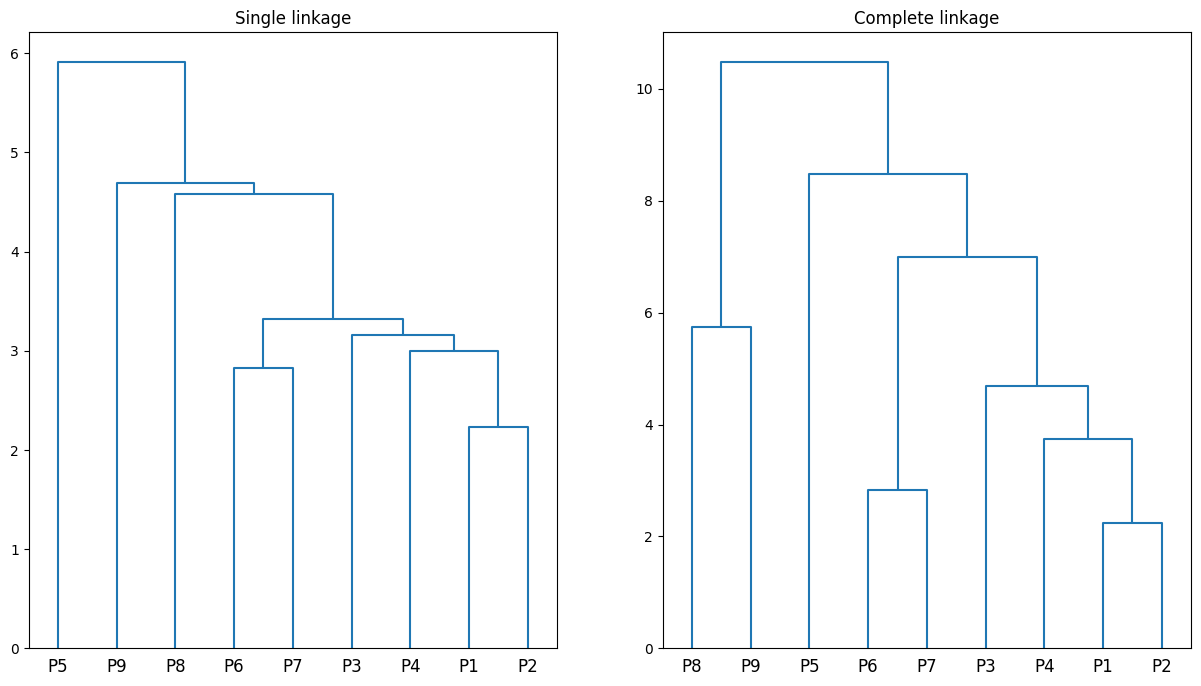

In [2]:
## Hierarchical clustering

from scipy.cluster import hierarchy
import matplotlib.pyplot as plt
import pandas as pd
plt.rcParams['figure.figsize'] = [15, 8]

andmed = pd.DataFrame(
    {'ID':['P1','P2','P3','P4','P5','P6','P7','P8','P9'],
    'x':[0,1,4,2,0,1,3,7,6],
    'y':[1,1,0,3,5,6,6,4,8],
    'z':[2,4,4,1,9,2,4,3,7]})
    
    
    
single = hierarchy.linkage(andmed[['x','y','z']], 'single')
plt.subplot(1,2,1)
plt.title('Single linkage')
single_dm = hierarchy.dendrogram(single, labels=andmed.ID.tolist(), color_threshold=0)

complete = hierarchy.linkage(andmed[['x','y','z']], 'complete')
plt.subplot(1,2,2)
plt.title('Complete linkage')
complete_dm = hierarchy.dendrogram(complete, labels=andmed.ID.tolist(), color_threshold=0)

plt.show()

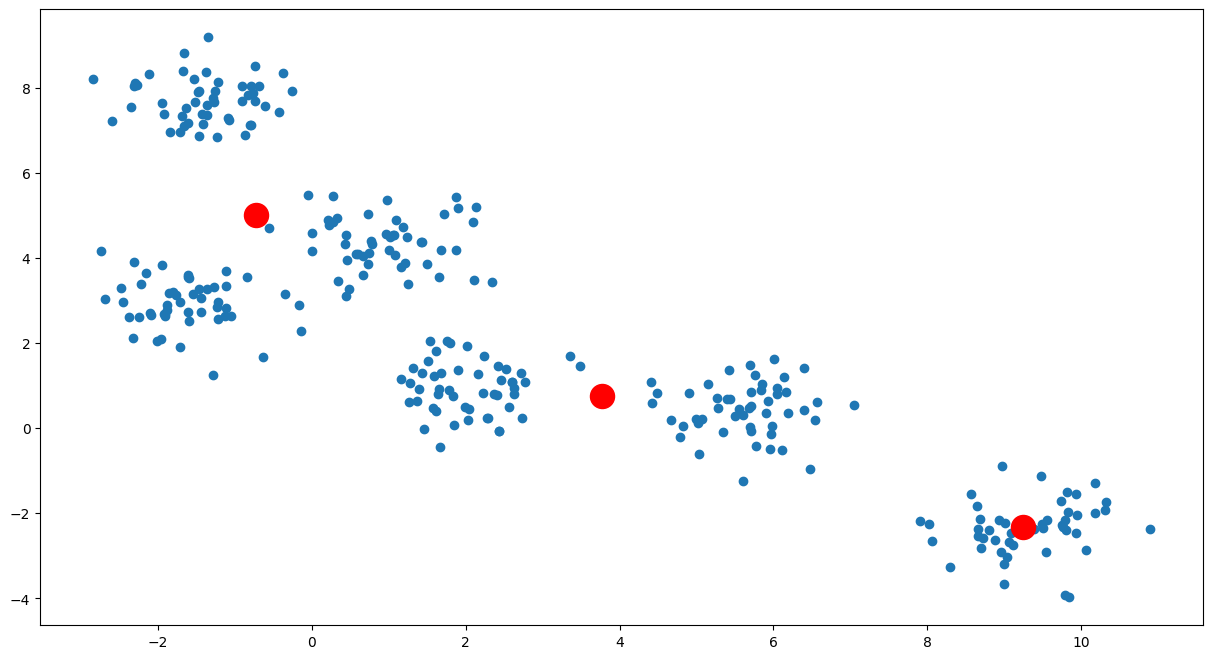

In [4]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

import numpy as np
X, y = make_blobs(n_samples=300, centers=3, cluster_std=0.60, random_state=0)

kmeans = KMeans(n_clusters=3,max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X)
plt.scatter(X[:,0], X[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()